<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df = pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [106]:
df.shape

(1000, 11)

#### Columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [7]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [3]:
df.fillna('Unknow', inplace = True)

In [10]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [11]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [13]:
cols = ['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk']

for i in cols:
    print(f"Unique values in {i} : {df[i].unique()}")

Unique values in Unnamed: 0 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

Unique values in Unnamed: 0 = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

##### Create a New column Id by replacing unnamed column

In [4]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace = True)

In [30]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [32]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [34]:
df.groupby(['Sex', 'Risk', 'Purpose'])['Sex', 'Risk', 'Purpose'].value_counts()

C:\Users\mnkv1\AppData\Local\Temp\ipykernel_15112\457167502.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Sex', 'Risk', 'Purpose'])['Sex', 'Risk', 'Purpose'].value_counts()


Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [38]:
df.groupby(['Purpose', 'Risk', 'Sex'])['Purpose', 'Risk', 'Sex'].value_counts()

C:\Users\mnkv1\AppData\Local\Temp\ipykernel_15112\2572839472.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Purpose', 'Risk', 'Sex'])['Purpose', 'Risk', 'Sex'].value_counts()


Purpose              Risk  Sex   
business             bad   female      7
                           male       27
                     good  female     12
                           male       51
car                  bad   female     40
                           male       66
                     good  female     54
                           male      177
domestic appliances  bad   female      2
                           male        2
                     good  female      4
                           male        4
education            bad   female      9
                           male       14
                     good  female     15
                           male       21
furniture/equipment  bad   female     28
                           male       30
                     good  female     46
                           male       77
radio/TV             bad   female     19
                           male       43
                     good  female     66
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

<Axes: xlabel='Risk', ylabel='count'>

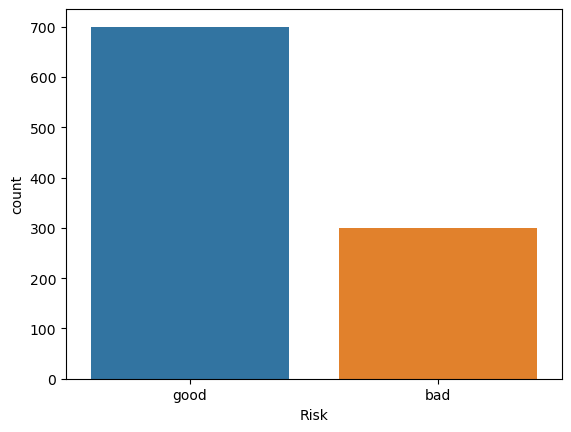

In [39]:
sns.countplot(x = df['Risk'])

<Axes: xlabel='Sex', ylabel='count'>

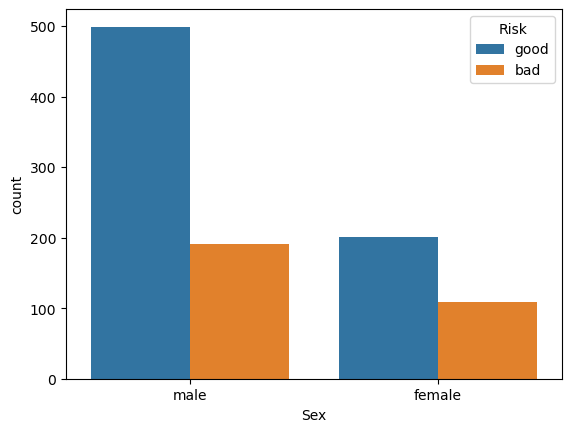

In [41]:
sns.countplot(x = df['Sex'], hue = df['Risk'])

Text(0, 0.5, 'Total Number of Credit holders')

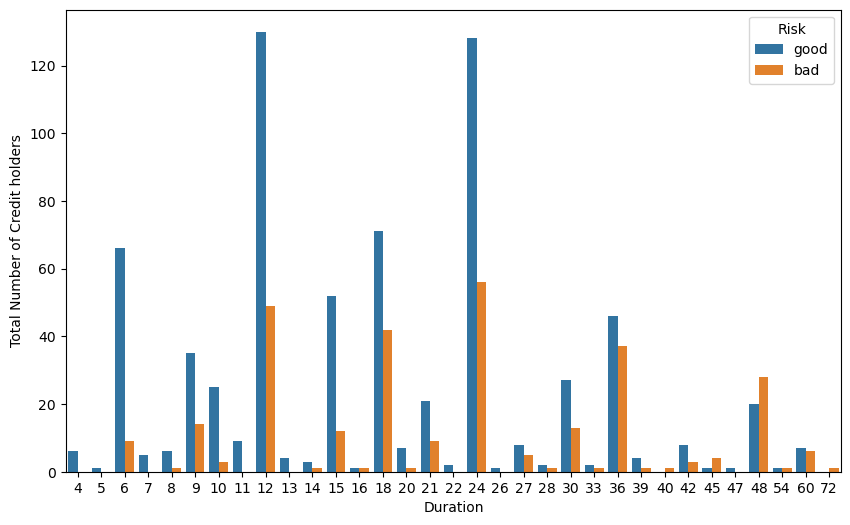

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Duration'], hue = df['Risk'])
plt.ylabel('Total Number of Credit holders')

Text(0, 0.5, 'Total number of credit holders')

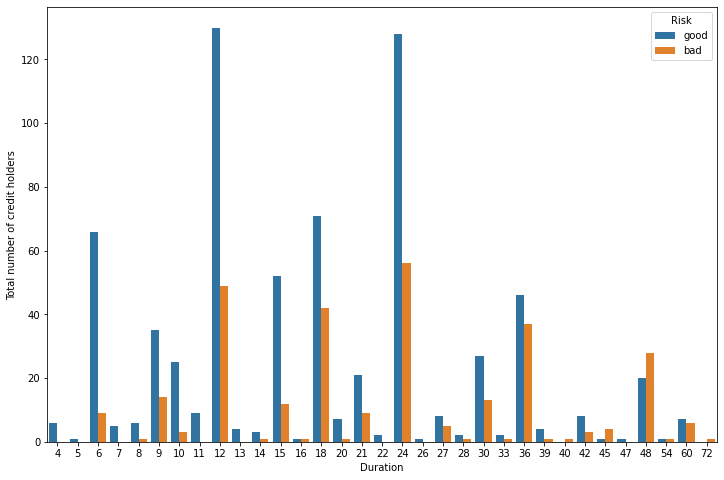

Text(0, 0.5, 'Total Number of Credit holders')

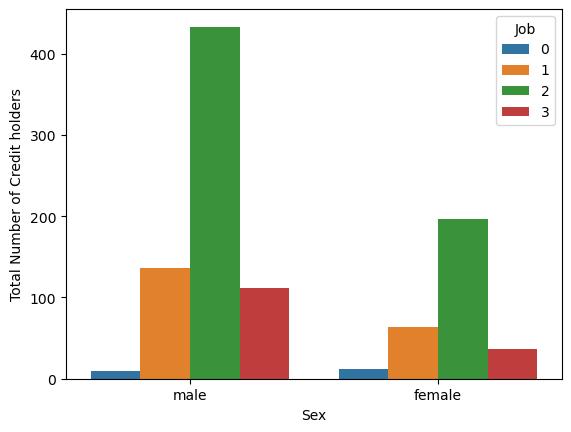

In [48]:
sns.countplot( x = df['Sex'], hue = df['Job'])
plt.ylabel('Total Number of Credit holders')

Text(0, 0.5, 'Total number of credit holders')

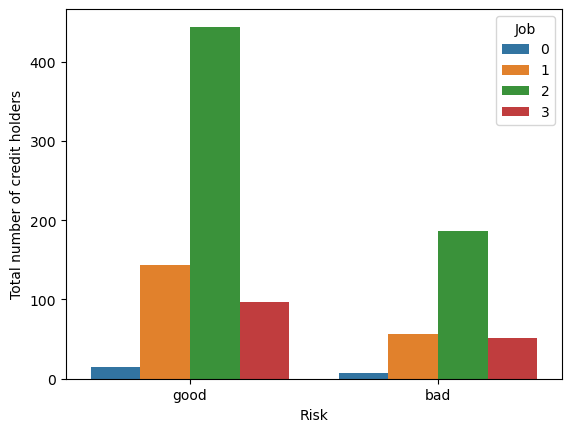

In [5]:
sns.countplot(x = df['Risk'], hue = df['Job'])
plt.ylabel('Total number of credit holders')

Text(0, 0.5, 'Total number of credit holders')

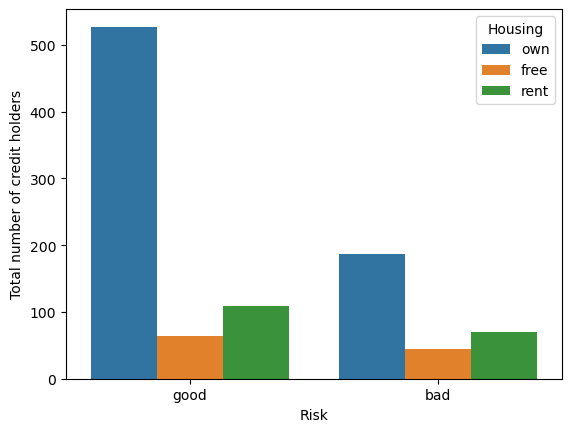

In [6]:
sns.countplot(x = df['Risk'], hue = df['Housing'])
plt.ylabel('Total number of credit holders')

In [33]:
list(enumerate(df['Purpose'].unique()))

[(0, 'radio/TV'),
 (1, 'education'),
 (2, 'furniture/equipment'),
 (3, 'car'),
 (4, 'business'),
 (5, 'domestic appliances'),
 (6, 'repairs'),
 (7, 'vacation/others')]

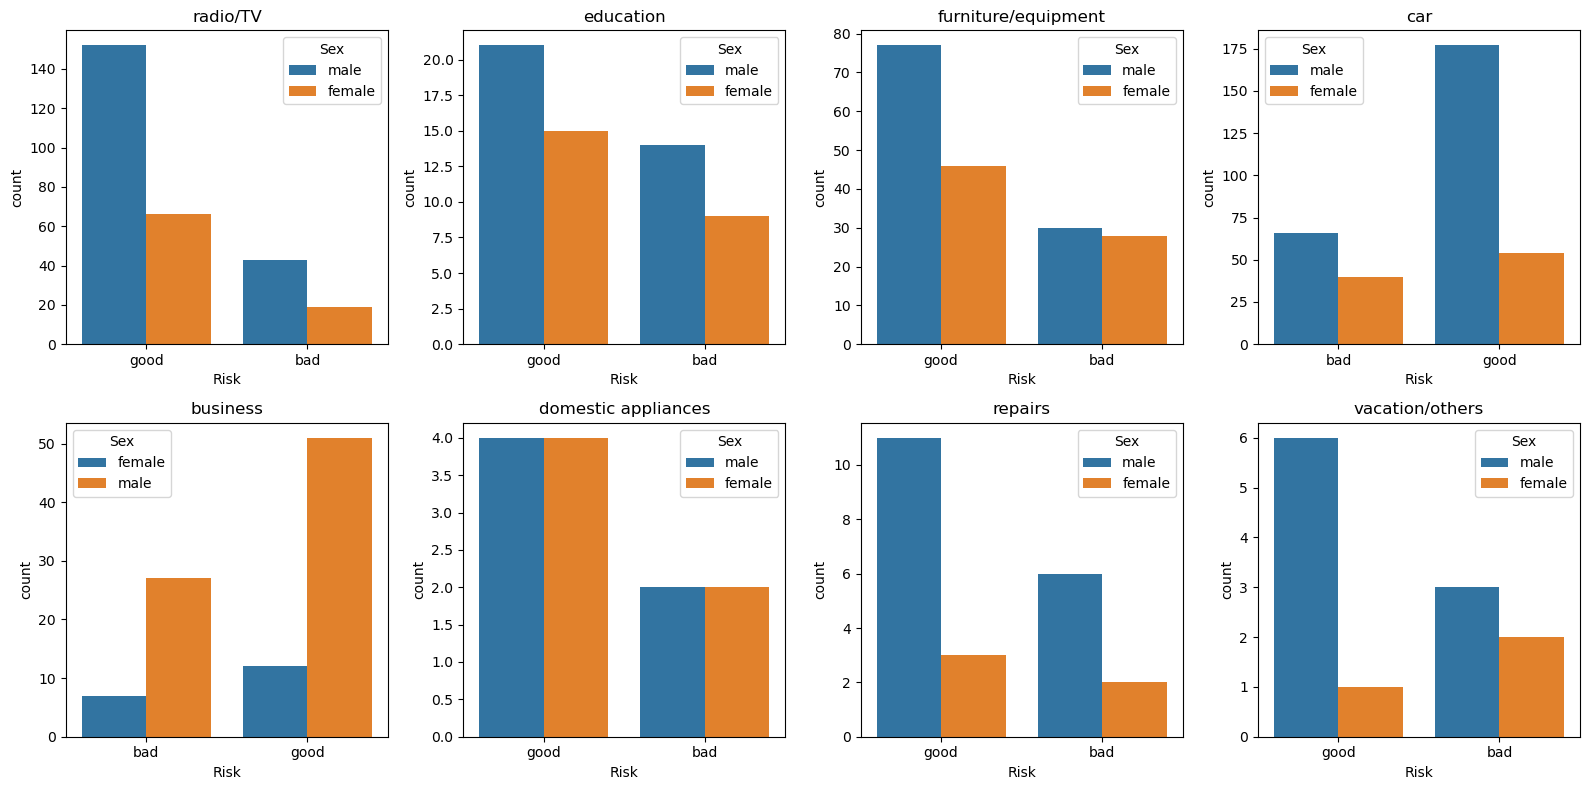

In [41]:
plt.figure(figsize=(16,8))
for i, col in enumerate(df['Purpose'].unique()):
    c = df[df['Purpose'] == col]
    plt.subplot(2,4, i+1)
    plt.title(col)
    sns.countplot(x = c['Risk'], hue = c['Sex'])
plt.tight_layout()

In [6]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknow,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknow,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [43]:
df['Job'].unique()

array([2, 1, 3, 0], dtype=int64)

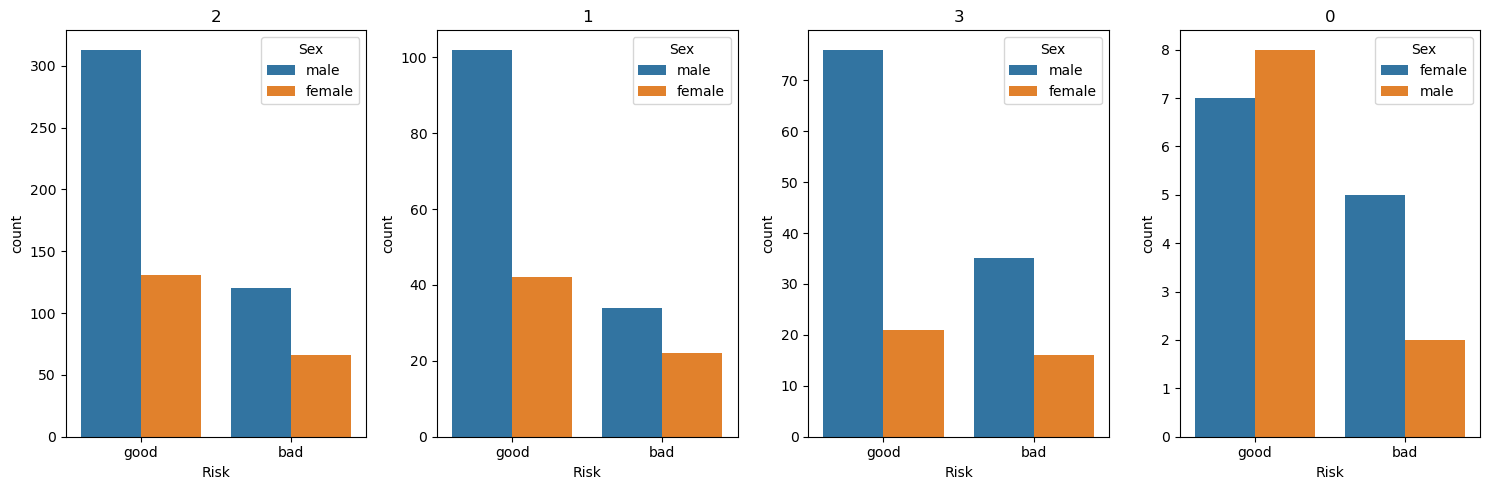

In [50]:
plt.figure(figsize= (15,5))
for i, col in enumerate(df['Job'].unique()):
    j = df[df['Job'] == col]
    plt.subplot(1, 4, i+1)
    plt.title(col)
    sns.countplot(x = j['Risk'] ,hue= j['Sex'])
plt.tight_layout()

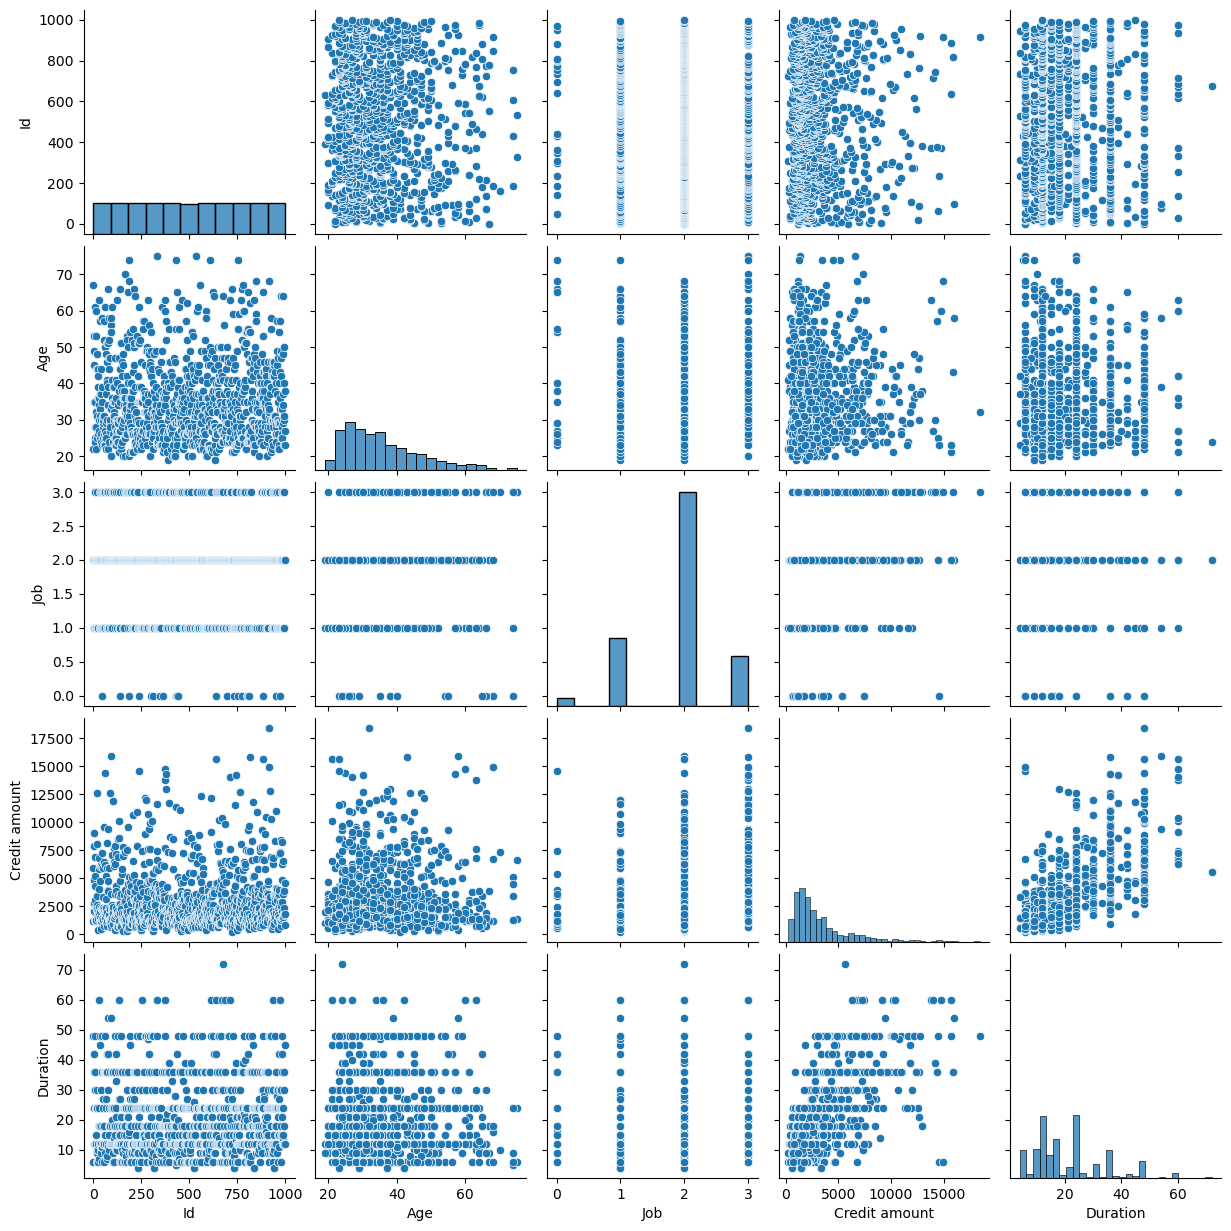

In [51]:
sns.pairplot(df)

<Axes: xlabel='Risk', ylabel='count'>

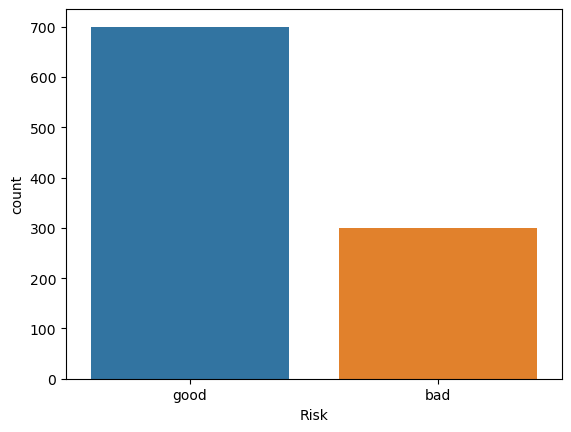

In [52]:
sns.countplot(x = df['Risk'])

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [95]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknow,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknow,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
purpose_df = pd.get_dummies(df['Purpose'])

In [113]:
purpose_df.head()

,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0


#### Use label encoding for rest of the categorical data

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df['Risk'] = le.fit_transform(df['Risk'])

In [11]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,0,1,1169,6,radio/TV,1
1,1,22,0,2,1,1,2,5951,48,radio/TV,0
2,2,49,1,1,1,1,0,2096,12,education,1
3,3,45,1,2,0,1,1,7882,42,furniture/equipment,1
4,4,53,1,2,0,1,1,4870,24,car,0


In [8]:
new_df = pd.concat([df, purpose_df], axis= 1)

In [9]:
new_df.drop(columns= ['Id', 'Purpose'], inplace = True)

In [116]:
new_df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,0,1,1169,6,1,0,0,0,0,0,1,0,0
1,22,0,2,1,1,2,5951,48,0,0,0,0,0,0,1,0,0
2,49,1,1,1,1,0,2096,12,1,0,0,0,1,0,0,0,0
3,45,1,2,0,1,1,7882,42,1,0,0,0,0,1,0,0,0
4,53,1,2,0,1,1,4870,24,0,0,1,0,0,0,0,0,0


In [28]:
newdf.head(1)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,business,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,67,1,2,1,0,1,1169,6,1,0,0,0,0,1,0,0


### Check the unique values in the new dataframe

In [119]:
for i in new_df.columns:
    print(f"Unique values in {i} are {new_df[i].unique()}")

Unique values in Age are [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Unique values in Sex are [1 0]
Unique values in Job are [2 1 3 0]
Unique values in Housing are [1 0 2]
Unique values in Saving accounts are [0 1 3 4 2]
Unique values in Checking account are [1 2 0 3]
Unique values in Credit amount are [ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012

### Plot heatmap

<Axes: >

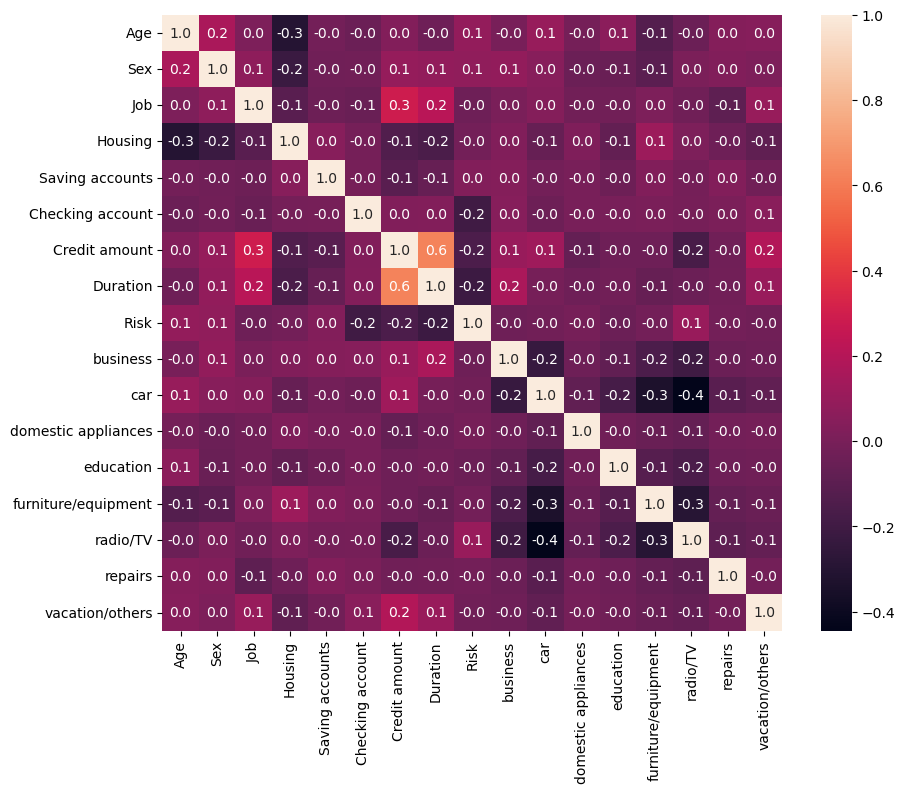

In [126]:
plt.figure(figsize = (10,8))
sns.heatmap(new_df.corr(), annot= True, fmt = '.1f')

## Select the Dependent(target) and Independent Variables:

In [10]:
X = new_df.drop(columns= ['Risk'])
y = new_df['Risk']

# Standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X = pd.DataFrame(scaler.fit_transform(X), columns= X.columns)

In [14]:
X.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
0,2.766456,0.670280,0.146949,-0.133710,-1.231393,-0.001045,-0.745131,-1.236478,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
1,-1.191404,-1.491914,0.146949,-0.133710,-0.196609,1.044372,0.949817,2.248194,-0.327749,-0.712949,-0.110208,-0.250398,-0.470108,1.603567,-0.149983,-0.110208
2,1.183312,0.670280,-1.383771,-0.133710,-0.196609,-1.046463,-0.416562,-0.738668,-0.327749,-0.712949,-0.110208,3.993639,-0.470108,-0.623610,-0.149983,-0.110208
3,0.831502,0.670280,0.146949,-2.016956,-0.196609,-0.001045,1.634247,1.750384,-0.327749,-0.712949,-0.110208,-0.250398,2.127172,-0.623610,-0.149983,-0.110208
4,1.535122,0.670280,0.146949,-2.016956,-0.196609,-0.001045,0.566664,0.256953,-0.327749,1.402626,-0.110208,-0.250398,-0.470108,-0.623610,-0.149983,-0.110208


# Split the data into training and testing set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [17]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [120]:
params = {'max_depth': [None, 1, 5, 10],
          'n_estimators': [16, 32, 50, 100], 
          'n_jobs': [1, 2],
          'random_state': [1, 10, 20, 42]},

In [121]:
gscv = GridSearchCV(RandomForestClassifier(), params, cv = 5, scoring= 'accuracy')

In [122]:
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=({'max_depth': [None, 1, 5, 10],
                          'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                          'random_state': [1, 10, 20, 42]},),
             scoring='accuracy')

In [123]:
print("Best estimaator is: ", gscv.best_estimator_)
print("Best Parameters : ", gscv.best_params_)
print("Best Score is: ", gscv.best_score_)

Best estimaator is:  RandomForestClassifier(n_jobs=1, random_state=20)
Best Parameters :  {'max_depth': None, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 20}
Best Score is:  0.7557142857142857


In [126]:
rf_model = RandomForestClassifier(max_depth= None, n_estimators= 100, n_jobs= 1, random_state= 20)

In [127]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=1, random_state=20)

In [128]:
rf_y_pred = rf_model.predict(X_test)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [25]:
print("Accuracy Score = ", metrics.accuracy_score(y_test,rf_y_pred))
print("Confusion Metrics:\n", metrics.confusion_matrix(y_test, rf_y_pred))
print("Classification report:\n", metrics.classification_report(y_test, rf_y_pred))
print("Cross Validation Score: ", cross_val_score(rf_model, X, y, cv = 5).mean())

Accuracy Score =  0.7333333333333333
Confusion Metrics:
 [[ 31  62]
 [ 18 189]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.33      0.44        93
           1       0.75      0.91      0.83       207

    accuracy                           0.73       300
   macro avg       0.69      0.62      0.63       300
weighted avg       0.72      0.73      0.70       300

Cross Validation Score:  0.737


#### Visualize the confusion matrix

<Axes: >

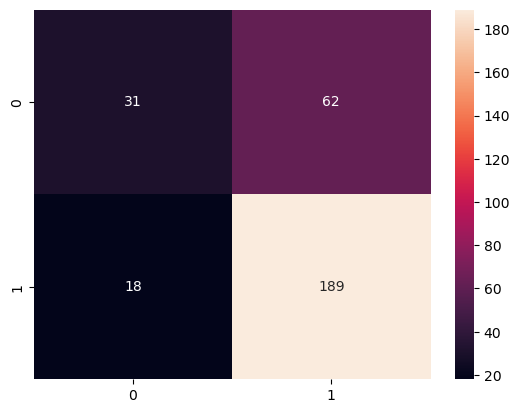

In [26]:
sns.heatmap(metrics.confusion_matrix(y_test, rf_y_pred), annot= True, fmt = 'd')

## SupportVectorClassifier:

In [27]:
from sklearn.svm import SVC

In [28]:
sv_params = {'C': [0.75, 0.85, 0.95, 1],
          'degree': [3, 4, 5],
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

In [29]:
svm_gs = GridSearchCV(SVC(), sv_params, cv = 5)

In [30]:
svm_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [31]:
print("Best estimaator is: ", svm_gs.best_estimator_)
print("Best Parameters : ", svm_gs.best_params_)
print("Best Score is: ", svm_gs.best_score_)

Best estimaator is:  SVC(C=0.85)
Best Parameters :  {'C': 0.85, 'degree': 3, 'kernel': 'rbf'}
Best Score is:  0.71


In [32]:
svm_model = SVC(C= 0.85, degree= 3, kernel= 'rbf')

In [33]:
svm_model.fit(X_train, y_train)

SVC(C=0.85)

In [34]:
svm_y_pred = svm_model.predict(X_test)

In [35]:
metrics.f1_score(y_test, svm_y_pred, average='weighted', labels=np.unique(svm_y_pred))

0.6283691085478573

In [36]:
print("Accuracy Score = ", metrics.accuracy_score(y_test,svm_y_pred))
print("Confusion Metrics:\n", metrics.confusion_matrix(y_test, svm_y_pred))
print("Classification report:\n", metrics.classification_report(y_test, svm_y_pred))
print("Cross Validation Score: ", cross_val_score(svm_model, X, y, cv = 5).mean())

Accuracy Score =  0.7133333333333334
Confusion Metrics:
 [[ 10  83]
 [  3 204]]
Classification report:
               precision    recall  f1-score   support

           0       0.77      0.11      0.19        93
           1       0.71      0.99      0.83       207

    accuracy                           0.71       300
   macro avg       0.74      0.55      0.51       300
weighted avg       0.73      0.71      0.63       300

Cross Validation Score:  0.71


## LogisticRegression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
reg_model = LogisticRegression()

In [39]:
reg_model.fit(X_train, y_train)

LogisticRegression()

In [40]:
reg_model.score(X_train, y_train)

0.7071428571428572

In [41]:
reg_y_pred = reg_model.predict(X_test)

In [42]:
print("Accuracy Score = ", metrics.accuracy_score(y_test,reg_y_pred))
print("Confusion Metrics:\n", metrics.confusion_matrix(y_test, reg_y_pred))
print("Classification report:\n", metrics.classification_report(y_test, reg_y_pred))
print("Cross Validation Score: ", cross_val_score(reg_model, X, y, cv = 5).mean())

Accuracy Score =  0.7166666666666667
Confusion Metrics:
 [[ 19  74]
 [ 11 196]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.20      0.31        93
           1       0.73      0.95      0.82       207

    accuracy                           0.72       300
   macro avg       0.68      0.58      0.57       300
weighted avg       0.70      0.72      0.66       300

Cross Validation Score:  0.701


## AdaBoost: Classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada_params = {'n_estimators':[50,100,200],
           'learning_rate':[0.01,0.1,1.0],
           'algorithm': ['SAMME', 'SAMME.R'],
           'random_state': [None, 42, 2022]}

In [45]:
ada_gs = GridSearchCV(AdaBoostClassifier(), ada_params , cv=5)

In [46]:
ada_gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200],
                         'random_state': [None, 42, 2022]})

In [47]:
print(f'Best estimator is: {ada_gs.best_estimator_}')
print(f'Best parameters are: {ada_gs.best_params_}')
print(f'Best score is : {ada_gs.best_score_}')

Best estimator is: AdaBoostClassifier(algorithm='SAMME', n_estimators=200)
Best parameters are: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 200, 'random_state': None}
Best score is : 0.7357142857142857


In [48]:
ada_model = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 1.0, n_estimators= 200, random_state= None)

In [49]:
ada_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=200)

In [50]:
ada_y_pred = ada_model.predict(X_test)

In [51]:
print("Accuracy Score = ", metrics.accuracy_score(y_test,ada_y_pred))
print("Confusion Metrics:\n", metrics.confusion_matrix(y_test, ada_y_pred))
print("Classification report:\n", metrics.classification_report(y_test, ada_y_pred))
print("Cross Validation Score: ", cross_val_score(ada_model, X, y, cv = 5).mean())

Accuracy Score =  0.7266666666666667
Confusion Metrics:
 [[ 30  63]
 [ 19 188]]
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.32      0.42        93
           1       0.75      0.91      0.82       207

    accuracy                           0.73       300
   macro avg       0.68      0.62      0.62       300
weighted avg       0.71      0.73      0.70       300

Cross Validation Score:  0.7329999999999999


#### View scores of the different models 

In [52]:
df1 = pd.DataFrame({'Models':['Random Forest Classifier', 'Logistic Regression', 'Ada Boost Classifier', 'Support Vector Classifier'],
             'Score': [cross_val_score(rf_model, X, y, cv = 5).mean(), 
                       cross_val_score(reg_model, X, y, cv = 5).mean(),
                       cross_val_score(ada_model, X, y, cv = 5).mean(),
                       cross_val_score(svm_model, X, y, cv = 5).mean()]
                   })

In [53]:
df1

,Models,Score
0,Random Forest Classifier,0.737
1,Logistic Regression,0.701
2,Ada Boost Classifier,0.733
3,Support Vector Classifier,0.710


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [54]:
from sklearn.decomposition import PCA

In [55]:
pca_model = PCA(n_components= 5)

In [56]:
pca_model.fit(X_train)

PCA(n_components=5)

In [62]:
pca_model.n_components_

5

In [63]:
#Apply the mapping (transform) to both the training set and the test set.
train_X = pca_model.transform(X_train)
test_X = pca_model.transform(X_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [65]:
rf_model

RandomForestClassifier(n_jobs=1, random_state=20)


**Step 2: Make an instance of the Model**

In [66]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
# logisticRegr = LogisticRegression(solver = 'lbfgs')

In [67]:
rf_model.fit(train_X, y_train)

RandomForestClassifier(n_jobs=1, random_state=20)

In [68]:
rf_model.score(train_X, y_train)

1.0

In [69]:
pca_y_pred = rf_model.predict(test_X)

0.71

In [70]:
#Confusion Matrix
from sklearn import metrics

In [71]:
print(metrics.confusion_matrix(y_test, pca_y_pred))

[[ 16  77]
 [ 32 175]]


In [72]:
metrics.accuracy_score(y_test, pca_y_pred)

0.6366666666666667

## Model Deployment With Tkinter

### Import Tkinter Library

In [1]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will return the output of our prediction in an Entry box in tkinter window

In [76]:
df.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [3]:
def getpred():
    age1 = age.get()
    gender1 = gender.get()
    job1 = job.get()
    housing1 = housing.get()
    saving = savingsac.get()
    checking = checkingac.get()
    credit = int(credit_amount.get())
    duration1 = int(duration.get())
    
    if gender1 == 'Male':
        gender1 = 0
    else :
        gender1 = 1
        
    if job1 == 'Unskilled and Non-Resident':
        job1 = 0
    elif job1 == 'Unskilled and Resident':
        job1 = 1
    elif job1 == 'Skilled':
        job1 = 2
    elif job1 == 'Highly Skilled':
        job1 = 3
        
    if housing1 == 'Free':
        housing1 = 0
    elif housing1 == 'Own':
        housing1 = 1
    else :
        housing1 = 2
        
    if saving == 'Unknown':
        saving = 0
    elif saving == 'Little':
        saving = 1
    elif saving == 'Moderate':
        saving = 2
    elif saving == 'Quite Rich':
        saving = 3
    elif saving == 'Rich':
        saving = 4
        
    if checking == 'Unknown':
        checking = 0
    elif checking == 'Little':
        checking = 1 
    elif checking == 'Moderate':
        checking = 2
    elif checking == 'Rich':
        checking = 3
    
    selected_purpose = purpose.get()
    purpose_value = int(purpose_option.get()) if selected_purpose in ['radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'] else 0     

    scaled_inp = scaler.transform([[age1, gender1, job1, housing1, saving, checking, credit, duration1,purpose_value,0,0,0,0,0,0,0]])

    
    pred = rf_model.predict(scaled_inp)
    
    result.delete(0, END)
    
    if pred[0] == 0:
        result.insert(0, 'Good')
    else:
        result.insert(0, 'Bad')
        
        
def purpose_select(event):
    selected_purpose = purpose.get()
    if selected_purpose in ['radio/TV', 'education', 'furniture/equipment', 'car', 'business', 'domestic appliances', 'repairs', 'vacation/others']:
        purpose_value_label.pack()
        purpose_option.pack()
    else:
        purpose_value_label.pack_forget()
        purpose_option.pack_forget()
        

### Create Tkinter window and all necessary input and output boxes

In [5]:
window = Tk()
window.geometry('400x750')
window.title('Credit Analysis')

titlelabel = Label(window, text = 'Credit Risk Analysis', bg = 'red').pack(fill= 'both')    
Label(window).pack()

agelabel = Label(window, text = 'Age (19 - 75)').pack()
age = Entry(window)
age.pack()

Label(window).pack()

genderlabel = Label(window, text = 'Gender').pack()
gender = Combobox(window)
gender['values'] = ('Male', 'Female')
gender.set('-Select-')
gender.pack()

Label(window).pack()

joblabel = Label(window, text = 'Job').pack()
job = Combobox(window)
job['values'] = ('Unskilled and Non-Resident', 'Unskilled and Resident', 'Skilled', 'Highly Skilled')
job.set('-Select-')
job.pack()

Label(window).pack()

housinglabel = Label(window, text = 'Housing').pack()
housing = Combobox(window)
housing['values'] = ('Own', 'Free', 'Rent')
housing.set('-Select-')
housing.pack()

Label(window).pack()

savingsaclabel = Label(window, text = 'Savings Account').pack()
savingsac = Combobox(window)
savingsac['values'] = ('Unknown', 'Little', 'Quite Rich', 'Rich', 'Moderate')
savingsac.set('-Select-')
savingsac.pack()

Label(window).pack()

checkingaclabel = Label(window, text = 'Checkings Account').pack()
checkingac = Combobox(window)
checkingac['values'] = ('Unknown', 'Little', 'Moderate', 'Rich')
checkingac.set('-Select-')
checkingac.pack()

Label(window).pack()

creditamtlabel = Label(window, text = 'Credit Amount').pack()
credit_amount = Entry(window)
credit_amount.pack()

Label(window).pack()

durationlabel = Label(window, text = 'Duration(in months)').pack()
duration = Entry(window)
duration.pack()

Label(window).pack()

purposelabel = Label(window, text = 'Purpose').pack()
purpose = Combobox(window)
purpose['values'] = ('radio/TV', 'education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others')
purpose.set('-Select-')
purpose_value_label = Label(window, text='Purpose Value')
purpose_option = Spinbox(window, values=(0,1), wrap=True)
# Binding the function to the purpose Combobox selection event
purpose.bind('<<ComboboxSelected>>', purpose_select)
purpose.pack()

Label(window).pack()

button = Button(window, text = "Get Prediction", bd = '3', command = getpred)
button.pack()

Label(window).pack()

result = Entry(window)
result.pack()


window.mainloop()

***